In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
sns.set_style('whitegrid')
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics, model_selection, ensemble
%matplotlib inline

In [2]:
mae = lambda x, y: metrics.mean_absolute_error(y, x)
mse = lambda x, y: metrics.mean_squared_error(y, x)
r2 = lambda x, y: metrics.r2_score(y, x)
fam = lambda x, y: round(100 - np.mean(100 * (abs(x - y) / y)), 4)

reduce_dim = lambda dim, x: PCA(n_components=dim).fit_transform(StandardScaler().fit_transform(x))
train_test_split = lambda x, y: model_selection.train_test_split(x, y, test_size=0.2, random_state=0)

In [3]:
def reduce_dim(x):
    scaler = StandardScaler()
    scaler.fit(x)
    scaler_trans = scaler.transform(x)
    
    pca = PCA(n_components = 2)
    pca.fit(scaler_trans)
    pca_trans = pca.transform(scaler_trans)
    return pca_trans

In [4]:
def hyper_parameter_tuning(x, y, regres, grid, folds, ver, job):
    model = model_selection.GridSearchCV(estimator = regres, param_grid = grid, cv = folds, verbose = ver, n_jobs=job)
    start = time.time()
    model.fit(x, y)
    end = time.time()
    print("Time Required to Execute : ", end-start)
    return model

In [5]:
def print_best_parameter(model):
    print("model.best_estimator_ : ", model.best_estimator_)
    print("model.best_index_ : ", model.best_index_)
    print("model.best_score_ : ", model.best_score_)
    print("model.best_params_ : ", model.best_params_)

In [6]:
def print_train_test_accuracy(X, Y, model):
    print(f'Train Accuracy - : {model.score(X, Y.ravel()):.3f}')
    print(f'Test Accuracy - : {model.score(X, Y.ravel()):.3f}')

In [7]:
def multiple_linear(x, y):
    pca_trans = reduce_dim(x)
    X_train, X_test, Y_train, Y_test = train_test_split(x, y)
    
    MLR = LinearRegression()
    MLR.fit(X_train, Y_train)
    
    pred = MLR.predict((X_test))
    results = model_selection.cross_val_score(MLR, x, y, cv=2)
    
    print("---------------------------------------------------------------")
    print("---------------------------------------------------------------")
    print("Mean Square Error (MSE) : ", mse(pred, Y_test))
    print("Root Mean Square Error (RMSE) : ", np.sqrt(mse(pred, Y_test)))
    print("mean_absolute_error : ", mae(pred, Y_test))
    print("R2-Score : ", r2(np.round(pred, 2), Y_test))
    print("Find Accuracy Manually : ", fam(pred, Y_test))
    print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))
    print("---------------------------------------------------------------")
    print("---------------------------------------------------------------")
    
    plt.plot(Y_test, pred,"*")
    fig = plt.figure(figsize = (8, 6))
    plt.plot(pred[:50], label='Predict Chance of Admit')
    plt.plot(Y_test[:50], label='Already Predicated Chance of Admit')
    plt.legend()
    plt.show()

In [8]:
def multiple_linear_pca(x, y):
    pca_trans = reduce_dim(x)
    X_train, X_test, Y_train, Y_test = train_test_split(pca_trans, y)
    
    MLR=LinearRegression()
    MLR.fit(X_train, Y_train)
    
    pred = MLR.predict((X_test))
    results = model_selection.cross_val_score(MLR, x, y, cv=2)
    
    print("---------------------------------------------------------------")
    print("---------------------------------------------------------------")
    print("Mean Square Error (MSE) : ", mse(pred, Y_test))
    print("Root Mean Square Error (RMSE) : ", np.sqrt(mse(pred, Y_test)))
    print("mean_absolute_error : ", mae(pred, Y_test))
    print("R2-Score : ", r2(np.round(pred, 2), Y_test))
    print("Find Accuracy Manually : ", fam(pred, Y_test))
    print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))
    print("---------------------------------------------------------------")
    print("---------------------------------------------------------------")
    
    plt.plot(Y_test, pred,"*")
    fig = plt.figure(figsize = (8, 6))
    plt.plot(pred[:30], label='Predict Chance of Admit')
    plt.plot(Y_test[:30], label='Already Predicated Chance of Admit')
    plt.legend()
    plt.show()

In [9]:
def random_forest(x, y):
    X_train, X_test, Y_train, Y_test = train_test_split(x, y)
    
    model = ensemble.RandomForestRegressor(n_estimators=500, n_jobs = -1)
    model.fit(X_train, Y_train)
    
    pred = model.predict(X_test)
    results = model_selection.cross_val_score(model, x, y, cv=2)
    
    print("---------------------------------------------------------------")
    print("---------------------------------------------------------------")
    print("Mean Square Error (MSE) : ", mse(pred, Y_test))
    print("Root Mean Square Error (RMSE) : ", np.sqrt(mse(pred, Y_test)))
    print("mean_absolute_error : ", mae(pred, Y_test))
    print("R2-Score : ", r2(np.round(pred, 2), Y_test))
    print("Find Accuracy Manually : ", fam(pred, Y_test))
    print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))
    print("---------------------------------------------------------------")
    print("---------------------------------------------------------------")
    
    plt.plot(Y_test, pred,"*")
    fig = plt.figure(figsize = (8, 6))
    plt.plot(model.predict((X_test))[:50], label='Predict Chance of Admit')
    plt.plot(Y_test[:50], label='Already Predicated Chance of Admit')
    plt.legend()
    plt.show()

In [10]:
def random_forest_pca(x, y):
    pca_trans = reduce_dim(x)
    X_train, X_test, Y_train, Y_test = train_test_split(pca_trans, y)
    
    param_grid = dict(n_estimators=[int(X) for X in np.linspace(start=10, stop=80, num=5)],
        max_depth=[2, 4, 6],
        min_samples_split=[2, 5],
        min_samples_leaf=[1, 2],
        bootstrap=[True, False])
    
    regressor = ensemble.RandomForestRegressor()
    regressor_model = hyper_parameter_tuning(x=X_train, y=Y_train, regres=regressor, grid=param_grid, folds=2, ver=2, job=-1)
    
    print("---------------------------------------------------------------")
    print("---------------------------------------------------------------")
    print_best_parameter(regressor_model)
    print("---------------------------------------------------------------")
    pred =regressor_model.predict((X_test))
    
    print("---------------------------------------------------------------")
    print(f'Train Accuracy - : {regressor_model.score(X_train, Y_train):.3f}')
    print(f'Test Accuracy - : {regressor_model.score(X_test, Y_test):.3f}')
    print("---------------------------------------------------------------")
    
    print("---------------------------------------------------------------")
    print("Mean Square Error (MSE) : ", mse(pred, Y_test))
    print("Root Mean Square Error (RMSE) : ", np.sqrt(mse(pred, Y_test)))
    print("mean_absolute_error : ", mae(pred, Y_test))
    print("R2-Score : ", r2(pred, Y_test))
    print("Find Accuracy Manually : ", fam(pred, Y_test))
    print("---------------------------------------------------------------")
    print("---------------------------------------------------------------")
    results = model_selection.cross_val_score(regressor_model, pca_trans, y, cv=10)
    print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))
    print("---------------------------------------------------------------")
    print("---------------------------------------------------------------")
    
    plt.plot(Y_test, pred, "*")
    fig = plt.figure(figsize = (8, 6))
    plt.plot(pred[:30], label='Predict Chance of Admit')
    plt.plot(Y_test[:30], label='Already Predicated Chance of Admit')
    plt.legend()
    plt.show()

In [11]:
score_card_data = pd.read_csv("Admission_Predict.csv")
X = score_card_data.drop(labels = ['Serial No.', 'Chance of Admit '], axis=1).values
Y = score_card_data.get('Chance of Admit ').values

---------------------------------------------------------------
---------------------------------------------------------------
Mean Square Error (MSE) :  0.004805156569785205
Root Mean Square Error (RMSE) :  0.06931923665033542
mean_absolute_error :  0.05008754843817953
R2-Score :  0.7415024610417478
Find Accuracy Manually :  91.91
Accuracy: 0.769 (0.038)
---------------------------------------------------------------
---------------------------------------------------------------


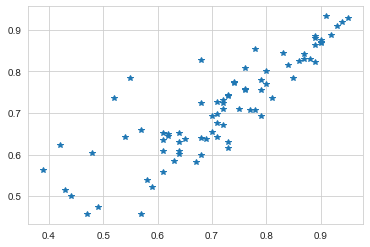

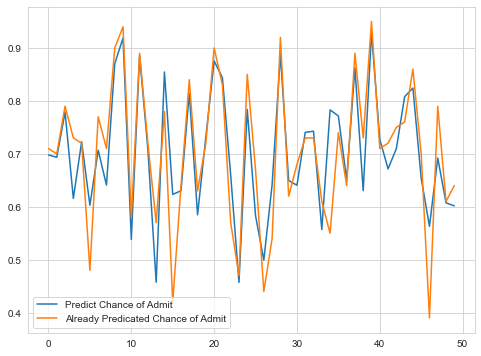

In [12]:
multiple_linear(X, Y)

---------------------------------------------------------------
---------------------------------------------------------------
Mean Square Error (MSE) :  0.006083615640000002
Root Mean Square Error (RMSE) :  0.07799753611493124
mean_absolute_error :  0.053924500000000174
R2-Score :  0.6643729052333367
Find Accuracy Manually :  91.2283
Accuracy: 0.733 (0.026)
---------------------------------------------------------------
---------------------------------------------------------------


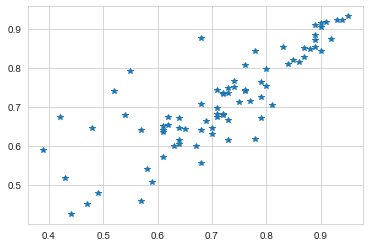

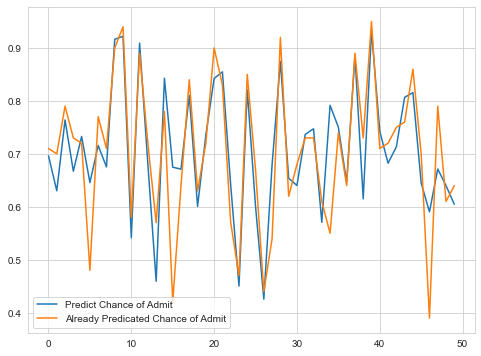

In [13]:
random_forest(X, Y)

---------------------------------------------------------------
---------------------------------------------------------------
Mean Square Error (MSE) :  0.005156915075644035
Root Mean Square Error (RMSE) :  0.07181166392476945
mean_absolute_error :  0.05367088424462789
R2-Score :  0.71425598102379
Find Accuracy Manually :  91.3336
Accuracy: 0.769 (0.038)
---------------------------------------------------------------
---------------------------------------------------------------


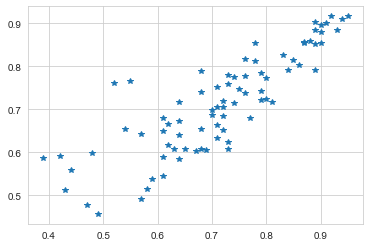

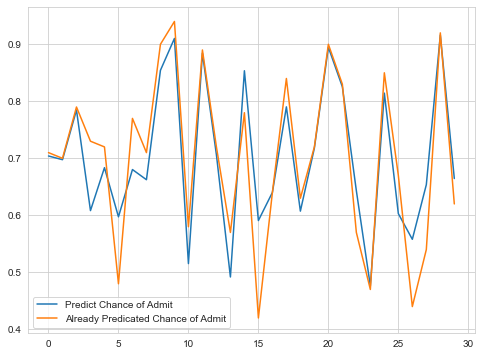

In [14]:
multiple_linear_pca(X, Y)

Fitting 2 folds for each of 120 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    6.7s finished


Time Required to Execute :  7.03334641456604
---------------------------------------------------------------
---------------------------------------------------------------
model.best_estimator_ :  RandomForestRegressor(max_depth=4, min_samples_leaf=2, n_estimators=80)
model.best_index_ :  34
model.best_score_ :  0.7726101505151015
model.best_params_ :  {'bootstrap': True, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 80}
---------------------------------------------------------------
---------------------------------------------------------------
Train Accuracy - : 0.841
Test Accuracy - : 0.691
---------------------------------------------------------------
---------------------------------------------------------------
Mean Square Error (MSE) :  0.005618365361607276
Root Mean Square Error (RMSE) :  0.07495575602718764
mean_absolute_error :  0.05579651788759292
R2-Score :  0.6907461019017789
Find Accuracy Manually :  90.9533
---------------------------

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 2 folds for each of 120 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 2 folds for each of 120 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    7.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 2 folds for each of 120 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 2 folds for each of 120 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    6.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 2 folds for each of 120 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 2 folds for each of 120 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 2 folds for each of 120 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 2 folds for each of 120 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    5.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 2 folds for each of 120 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    5.9s finished


Accuracy: 0.712 (0.106)
---------------------------------------------------------------
---------------------------------------------------------------


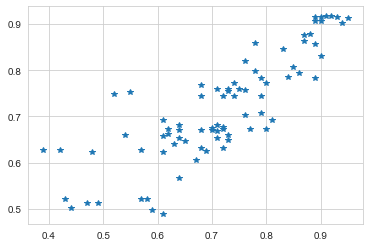

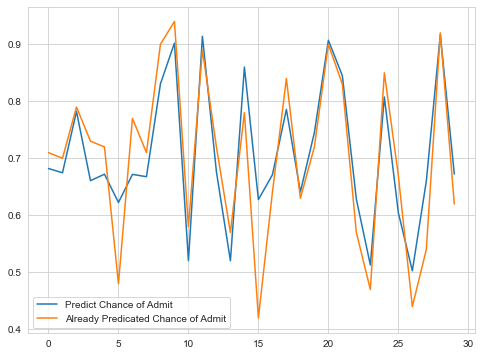

In [15]:
random_forest_pca(X, Y)